In [ ]:
#Needed for EDA in Google colab
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Import Required Packages for EDA
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')



In [ ]:
#Read the dataset/s
df = pd.read_csv('/content/gdrive/MyDrive/FACE MASK/annotations/maksssksksss102.xml')



In [ ]:
#1. Checking description(first 5 and last 5 rows)
df.head()

<annotation>
0                       <folder>images</folder>
1      <filename>maksssksksss102.png</filename>
2                                        <size>
3                            <width>400</width>
4                          <height>225</height>

In [ ]:
df.tail()

<annotation>
17              <xmax>251</xmax>
18              <ymax>106</ymax>
19                     </bndbox>
20                     </object>
21                 </annotation>

In [ ]:
df.shape

(22, 1)

In [ ]:
df.columns

Index(['<annotation>'], dtype='object')

In [ ]:
df.nunique()

<annotation>    22
dtype: int64

In [ ]:
df.info

<bound method DataFrame.info of                                     <annotation>
0                        <folder>images</folder>
1       <filename>maksssksksss102.png</filename>
2                                         <size>
3                             <width>400</width>
4                           <height>225</height>
5                               <depth>3</depth>
6                                        </size>
7                       <segmented>0</segmented>
8                                       <object>
9                         <name>with_mask</name>
10                      <pose>Unspecified</pose>
11                      <truncated>0</truncated>
12                        <occluded>0</occluded>
13                      <difficult>0</difficult>
14                                      <bndbox>
15                              <xmin>212</xmin>
16                               <ymin>57</ymin>
17                              <xmax>251</xmax>
18                              <ymax

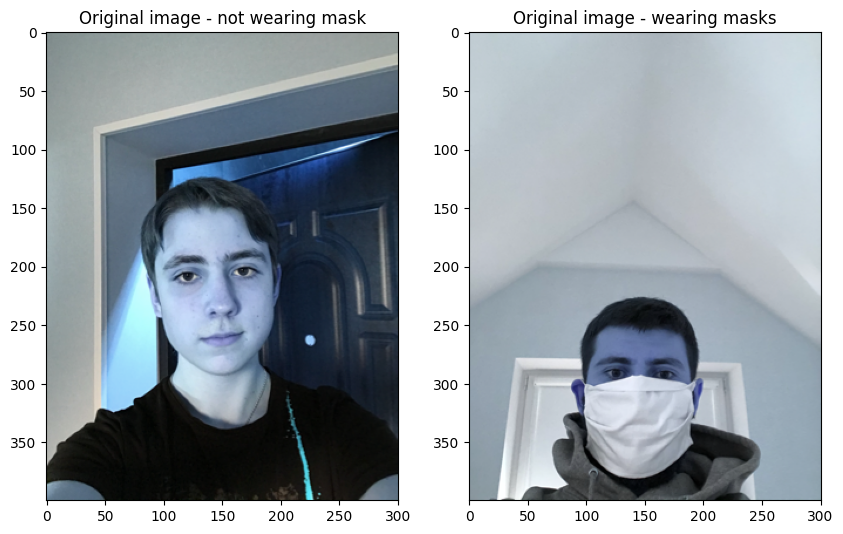

In [ ]:
#EDA Q2: How do images from different classes look like (Read and Display
import cv2
import matplotlib.pyplot as plt

img_path_1 = '/content/gdrive/MyDrive/FACE MASK/images/maksssksksss128.png'
img_1 = cv2.imread(img_path_1)

img_path_2 = '//content/gdrive/MyDrive/FACE MASK/images/maksssksksss10.png'
img_2 = cv2.imread(img_path_2)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img_1), plt.title('Original image - not wearing mask')
plt.subplot(122)
plt.imshow(img_2), plt.title('Original image - wearing masks')
plt.show()


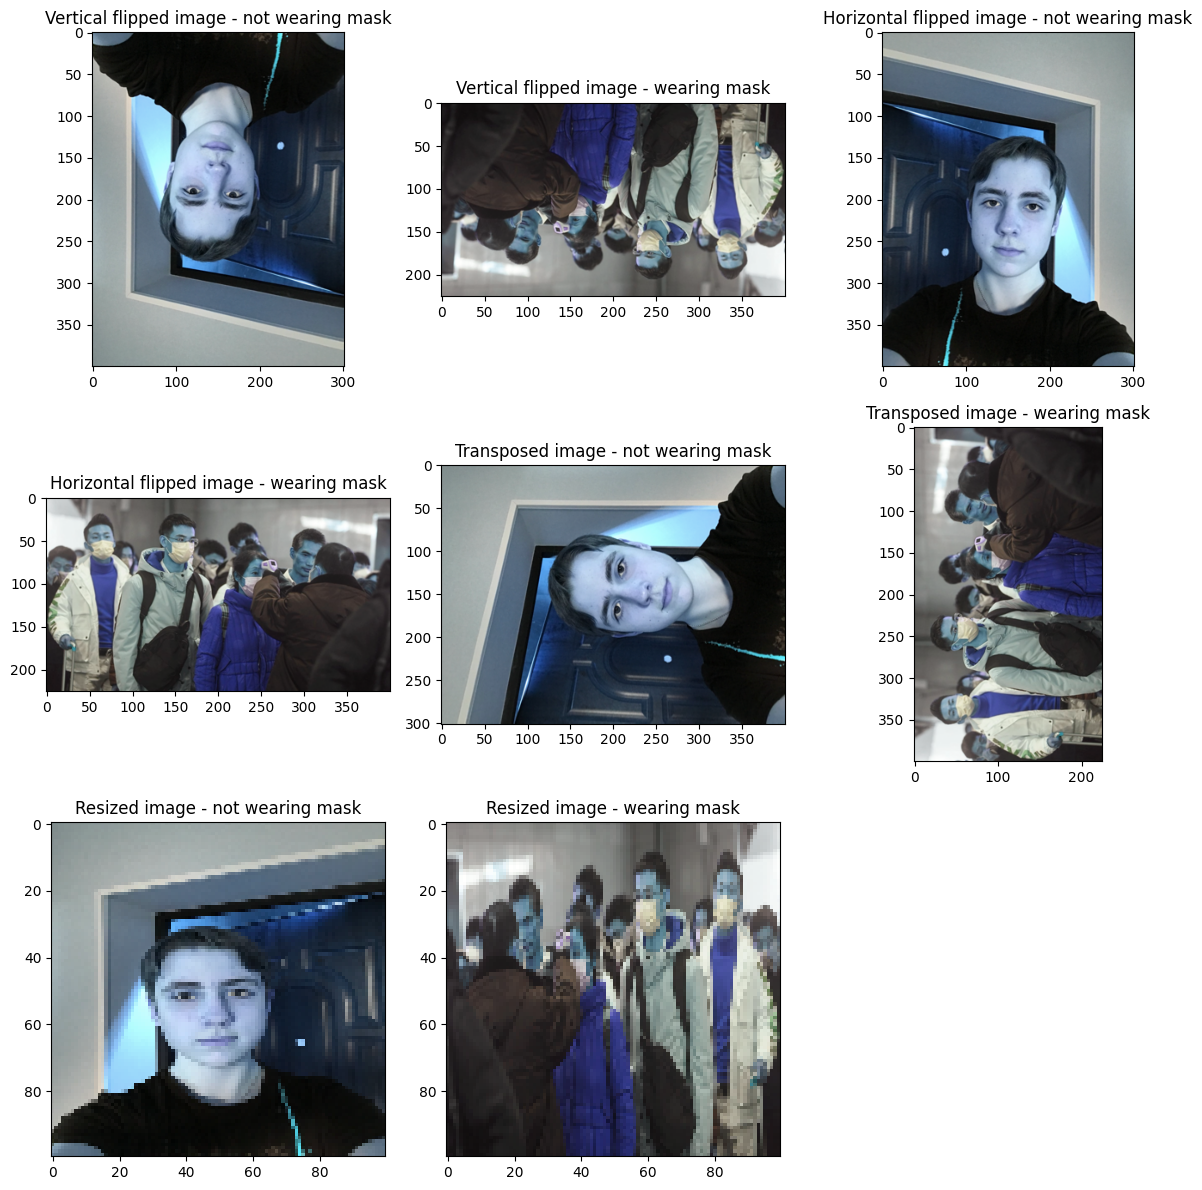

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path_1 = '/content/gdrive/MyDrive/FACE MASK/images/maksssksksss128.png'
img_1 = cv2.imread(img_path_1)

img_path_2 = '/content/gdrive/MyDrive/FACE MASK/images/maksssksksss157.png'
img_2 = cv2.imread(img_path_2)

# Basic image manipulation (rotating/flipping/transpose)
flip_img_v1 = cv2.flip(img_1, 0)  # vertical flip
flip_img_v2 = cv2.flip(img_2, 0)  # vertical flip

# Horizontal flip
flip_img_h1 = cv2.flip(img_1, 1)  # horizontal flip
flip_img_h2 = cv2.flip(img_2, 1)  # horizontal flip

# Transpose
transp_img_1 = cv2.transpose(img_1)  # transpose
transp_img_2 = cv2.transpose(img_2)  # transpose

# Extra Transformation
# Resize
resize_img_1 = cv2.resize(img_1, (100, 100))  # resize
resize_img_2 = cv2.resize(img_2, (100, 100))  # resize

plt.figure(figsize=(12, 12))

# Show images in subplots
plt.subplot(331)
plt.imshow(flip_img_v1)
plt.title('Vertical flipped image - not wearing mask')

plt.subplot(332)
plt.imshow(flip_img_v2)
plt.title('Vertical flipped image - wearing mask')

plt.subplot(333)
plt.imshow(flip_img_h1)
plt.title('Horizontal flipped image - not wearing mask')

plt.subplot(334)
plt.imshow(flip_img_h2)
plt.title('Horizontal flipped image - wearing mask')

plt.subplot(335)
plt.imshow(transp_img_1)
plt.title('Transposed image - not wearing mask')

plt.subplot(336)
plt.imshow(transp_img_2)
plt.title('Transposed image - wearing mask')

# Extra subplot for additional transformation
plt.subplot(337)
plt.imshow(resize_img_1)
plt.title('Resized image - not wearing mask')

plt.subplot(338)
plt.imshow(resize_img_2)
plt.title('Resized image - wearing mask')

plt.tight_layout()  # Optional - adjust layout
plt.show()


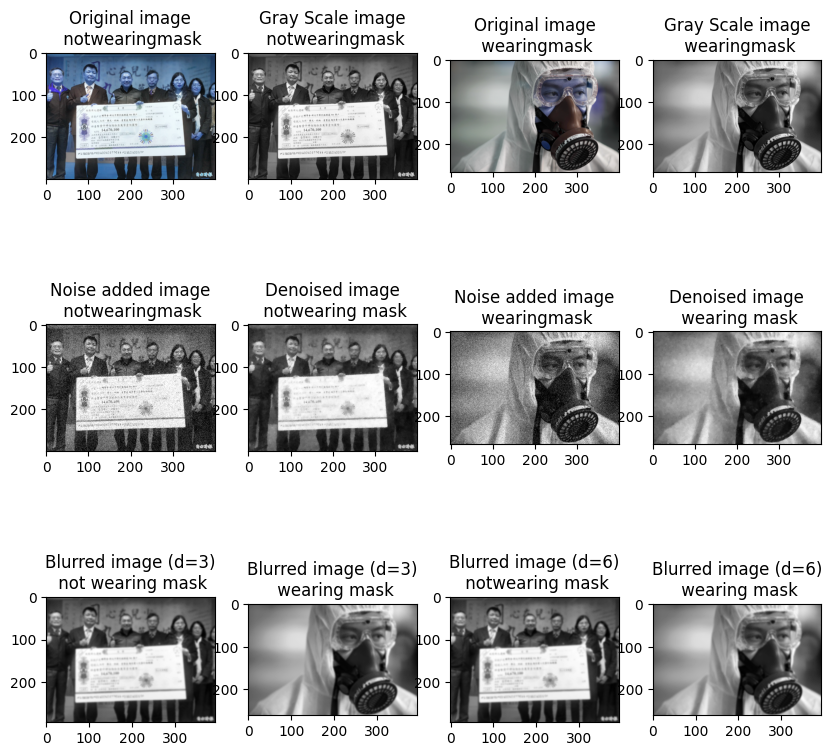

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku

%matplotlib inline

img_path_1 = '/content/gdrive/MyDrive/FACE MASK/images/maksssksksss121.png'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/gdrive/MyDrive/FACE MASK/images/maksssksksss122.png'
img_2 = cv2.imread(img_path_2)

# Gray scale conversion
img_1_gray = skic.rgb2gray(img_1)
img_2_gray = skic.rgb2gray(img_2)

# Adding Gaussian noise and denoising using denoise_tv_bregman approach for img_1 and img_2
img_1_n = sku.random_noise(skic.rgb2gray(img_1))
img_1_d = skimage.restoration.denoise_tv_bregman(img_1_n, 5.)
img_2_n = sku.random_noise(skic.rgb2gray(img_2))
img_2_d = skimage.restoration.denoise_tv_bregman(img_2_n, 5.)

# Noise reduction using Gaussian Blur
d = 3
img_1_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_2_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_1_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_2_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.figure(figsize=(10,10))

# Visualising Gray scale images
plt.subplot(341), plt.imshow(img_1),plt.title('Original image\n notwearingmask')
plt.subplot(342), plt.imshow(img_1_gray, cmap='gray'),plt.title('Gray Scale image\n notwearingmask')
plt.subplot(343), plt.imshow(img_2),plt.title('Original image\n wearingmask')
plt.subplot(344), plt.imshow(img_2_gray, cmap='gray'),plt.title('Gray Scale image\n wearingmask')

# Visualising Noising-Denoising images
plt.subplot(345), plt.imshow(img_1_n,cmap='gray'), plt.title('Noise added image\n notwearingmask')
plt.subplot(346), plt.imshow(img_1_d,cmap='gray'),plt.title('Denoised image\n notwearing mask')
plt.subplot(347), plt.imshow(img_2_n,cmap='gray'),plt.title('Noise added image\n wearingmask')
plt.subplot(348), plt.imshow(img_2_d,cmap='gray'),plt.title('Denoised image\n wearing mask')

# Visualising Noise Reduction with Gaussian Blurring
plt.subplot(349), plt.imshow(img_1_blur3,cmap='gray'), plt.title('Blurred image (d=3)\n not wearing mask')
plt.subplot(3,4,10), plt.imshow(img_2_blur3,cmap='gray'),plt.title('Blurred image (d=3)\n wearing mask')
plt.subplot(3,4,11), plt.imshow(img_1_blur6,cmap='gray'),plt.title('Blurred image (d=6)\n notwearing mask')
plt.subplot(3,4,12), plt.imshow(img_2_blur6,cmap='gray'),plt.title('Blurred image (d=6)\n wearing mask')

plt.show()

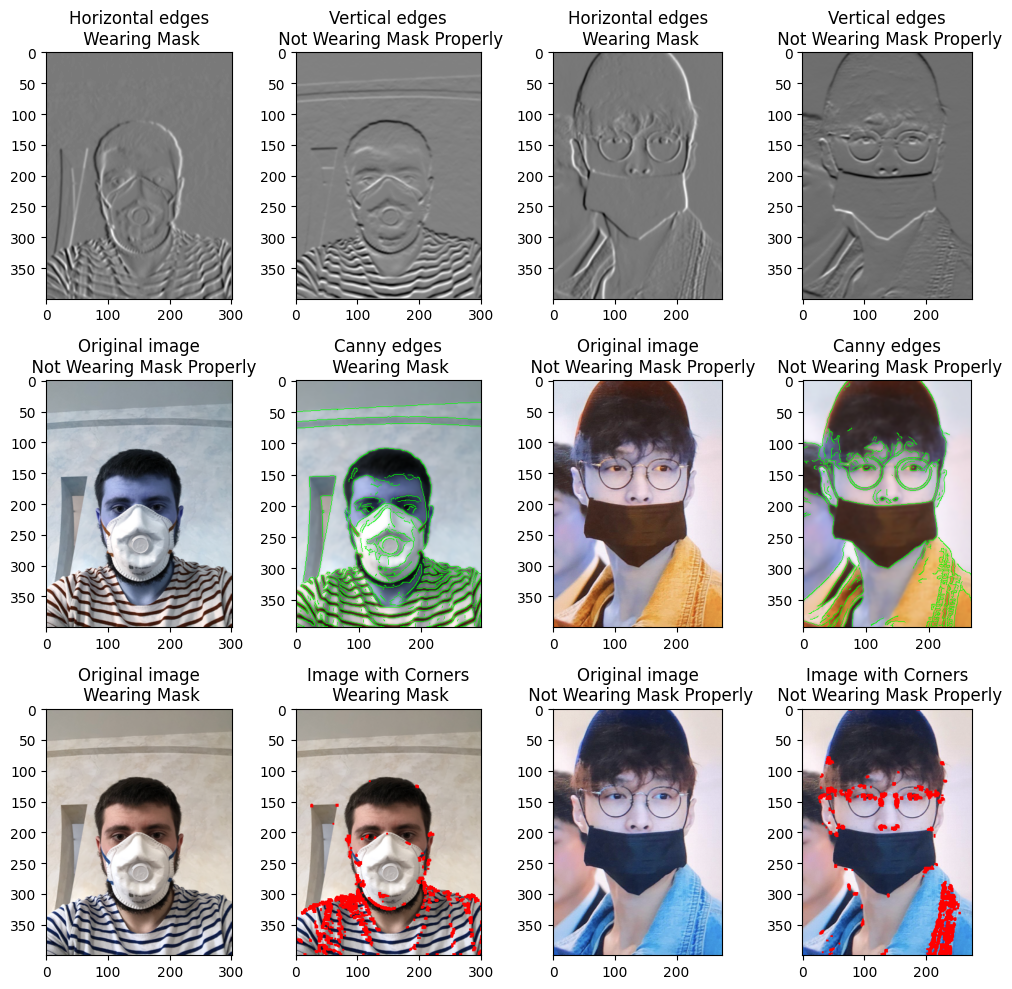

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path_1 = '/content/gdrive/MyDrive/FACE MASK/images/maksssksksss271.png'
img_path_2 = '/content/gdrive/MyDrive/FACE MASK/images/maksssksksss272.png'

img_1 = cv2.imread(img_path_1)
img_2 = cv2.imread(img_path_2)

# Sobel edge detector
sobel_img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
sobel_img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

sobelx_img_1 = cv2.Sobel(sobel_img_1, cv2.CV_64F, 1, 0, ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1, cv2.CV_64F, 0, 1, ksize=9)
sobelx_img_2 = cv2.Sobel(sobel_img_2, cv2.CV_64F, 1, 0, ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2, cv2.CV_64F, 0, 1, ksize=9)

# Canny edge detector
th1 = 30
th2 = 60
d = 3
edgeresult_1 = img_1.copy()
edgeresult_1 = cv2.GaussianBlur(edgeresult_1, (2 * d + 1, 2 * d + 1), -1)[d:-d, d:-d]
gray_1 = cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2GRAY)
edge_1 = cv2.Canny(gray_1, th1, th2)
edgeresult_1[edge_1 != 0] = (0, 255, 0)

edgeresult_2 = img_2.copy()
edgeresult_2 = cv2.GaussianBlur(edgeresult_2, (2 * d + 1, 2 * d + 1), -1)[d:-d, d:-d]
gray_2 = cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2GRAY)
edge_2 = cv2.Canny(gray_2, th1, th2)
edgeresult_2[edge_2 != 0] = (0, 255, 0)

# Corner detector
def detect_corners(image):
    harris = image.copy()
    gray = cv2.cvtColor(harris, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    blocksize = 4
    kernel_size = 3
    dst = cv2.cornerHarris(gray, blocksize, kernel_size, 0.05)
    dst = cv2.dilate(dst, None)
    harris[dst > 0.01 * dst.max()] = [0, 0, 255]
    return harris

harris_1 = detect_corners(img_1)
harris_2 = detect_corners(img_2)

# Visualizing Edges and Corners
plt.figure(figsize=(10, 10))

# Visualizing Sobel Edges
plt.subplot(341), plt.imshow(sobelx_img_1, cmap='gray'), plt.title('Horizontal edges\n Wearing Mask')
plt.subplot(342), plt.imshow(sobely_img_1, cmap='gray'), plt.title('Vertical edges\n Not Wearing Mask Properly')
plt.subplot(343), plt.imshow(sobelx_img_2, cmap='gray'), plt.title('Horizontal edges\n Wearing Mask')
plt.subplot(344), plt.imshow(sobely_img_2, cmap='gray'), plt.title('Vertical edges\n Not Wearing Mask Properly')

# Visualizing Canny Edges
plt.subplot(345), plt.imshow(img_1), plt.title('Original image\n  Not Wearing Mask Properly')
plt.subplot(346), plt.imshow(edgeresult_1, cmap='gray'), plt.title('Canny edges\n Wearing Mask')
plt.subplot(347), plt.imshow(img_2), plt.title('Original image\n  Not Wearing Mask Properly')
plt.subplot(348), plt.imshow(edgeresult_2, cmap='gray'), plt.title('Canny edges\n Not Wearing Mask Properly')

# Visualizing Corners
plt.subplot(349), plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)), plt.title('Original image\n Wearing Mask')
plt.subplot(3, 4, 10), plt.imshow(cv2.cvtColor(harris_1, cv2.COLOR_BGR2RGB)), plt.title('Image with Corners\n Wearing Mask')
plt.subplot(3, 4, 11), plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)), plt.title('Original image\n Not Wearing Mask Properly')
plt.subplot(3, 4, 12), plt.imshow(cv2.cvtColor(harris_2, cv2.COLOR_BGR2RGB)), plt.title('Image with Corners\n Not Wearing Mask Properly')

plt.tight_layout()
plt.show()


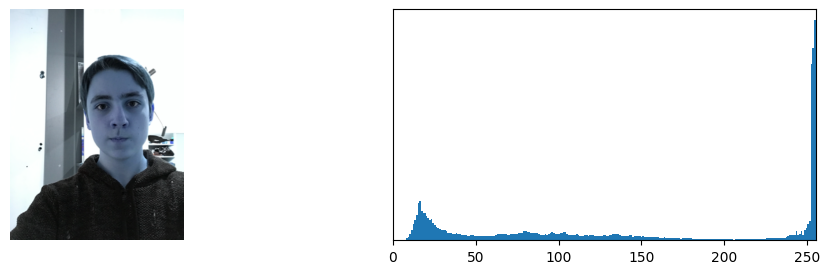

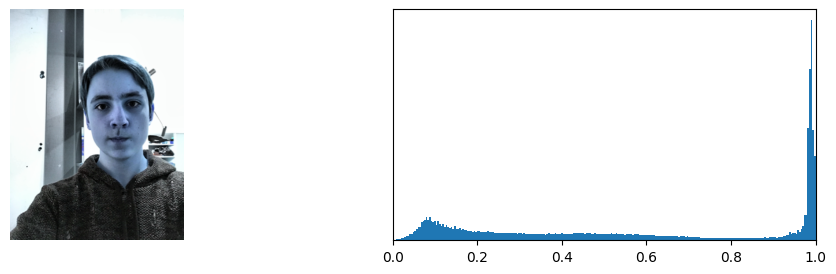

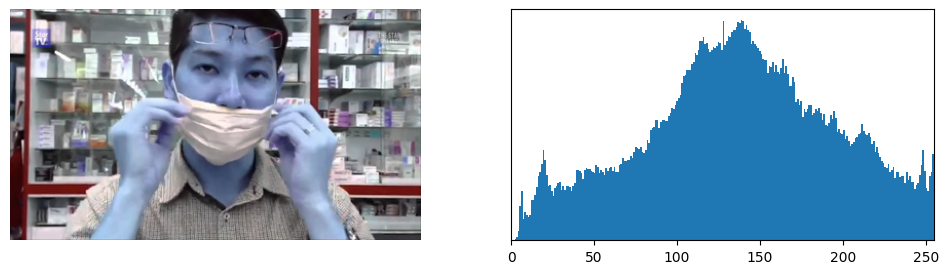

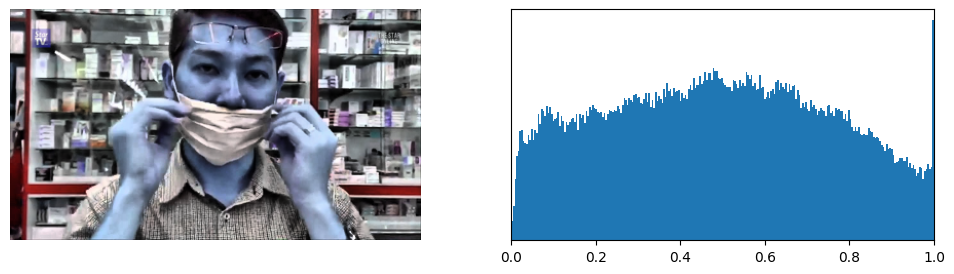

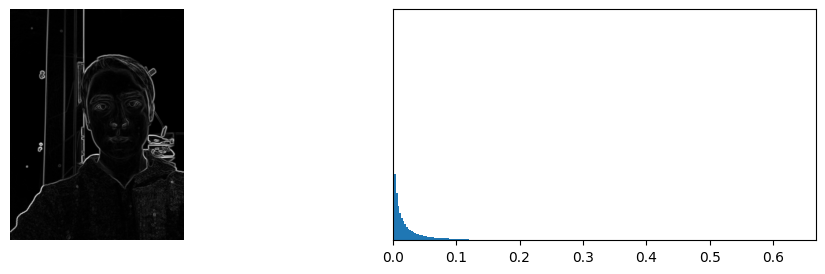

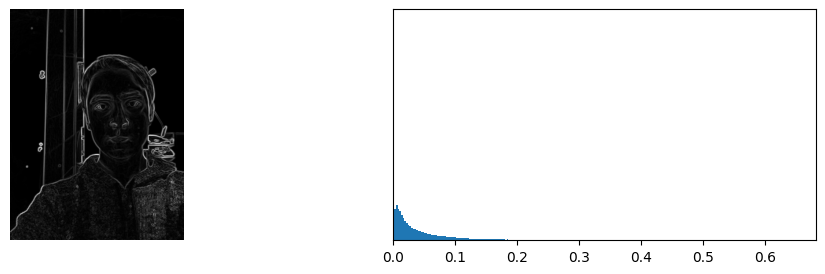

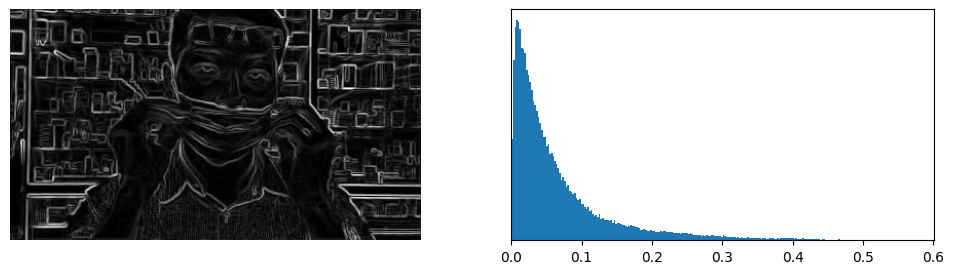

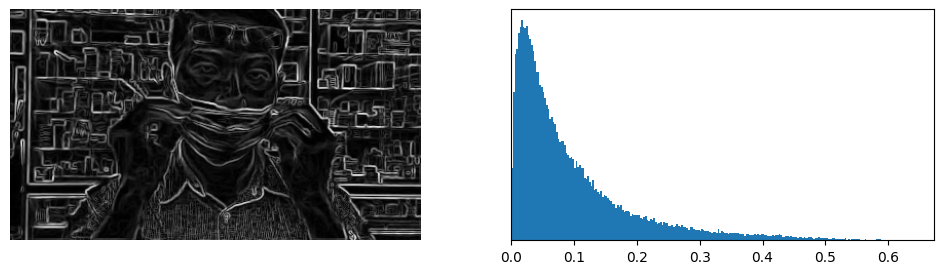

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.color as skic
import skimage.filters as skif
import skimage.exposure as skie

img_path_1 = '/content/gdrive/MyDrive/FACE MASK/images/maksssksksss370.png'
img_path_2 = '/content/gdrive/MyDrive/FACE MASK/images/maksssksksss371.png'

img_1 = cv2.imread(img_path_1)
img_2 = cv2.imread(img_path_2)

def show(img):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax2.hist(img.ravel(), lw=0, bins=256)
    ax2.set_xlim(0, img.max())
    ax2.set_yticks([])
    plt.show()

show(img_1)
show(skie.equalize_adapthist(img_1))

show(img_2)
show(skie.equalize_adapthist(img_2))

img = skic.rgb2gray(img_1)
sobimg_nheq = skif.sobel(img)
show(sobimg_nheq)

img = skic.rgb2gray(skie.equalize_adapthist(img_1))
sobimg_heq_1 = skif.sobel(img)
show(sobimg_heq_1)

img = skic.rgb2gray(img_2)
sobimg_nheq = skif.sobel(img)
show(sobimg_nheq)

img = skic.rgb2gray(skie.equalize_adapthist(img_2))
sobimg_heq_2 = skif.sobel(img)
show(sobimg_heq_2)


images 1


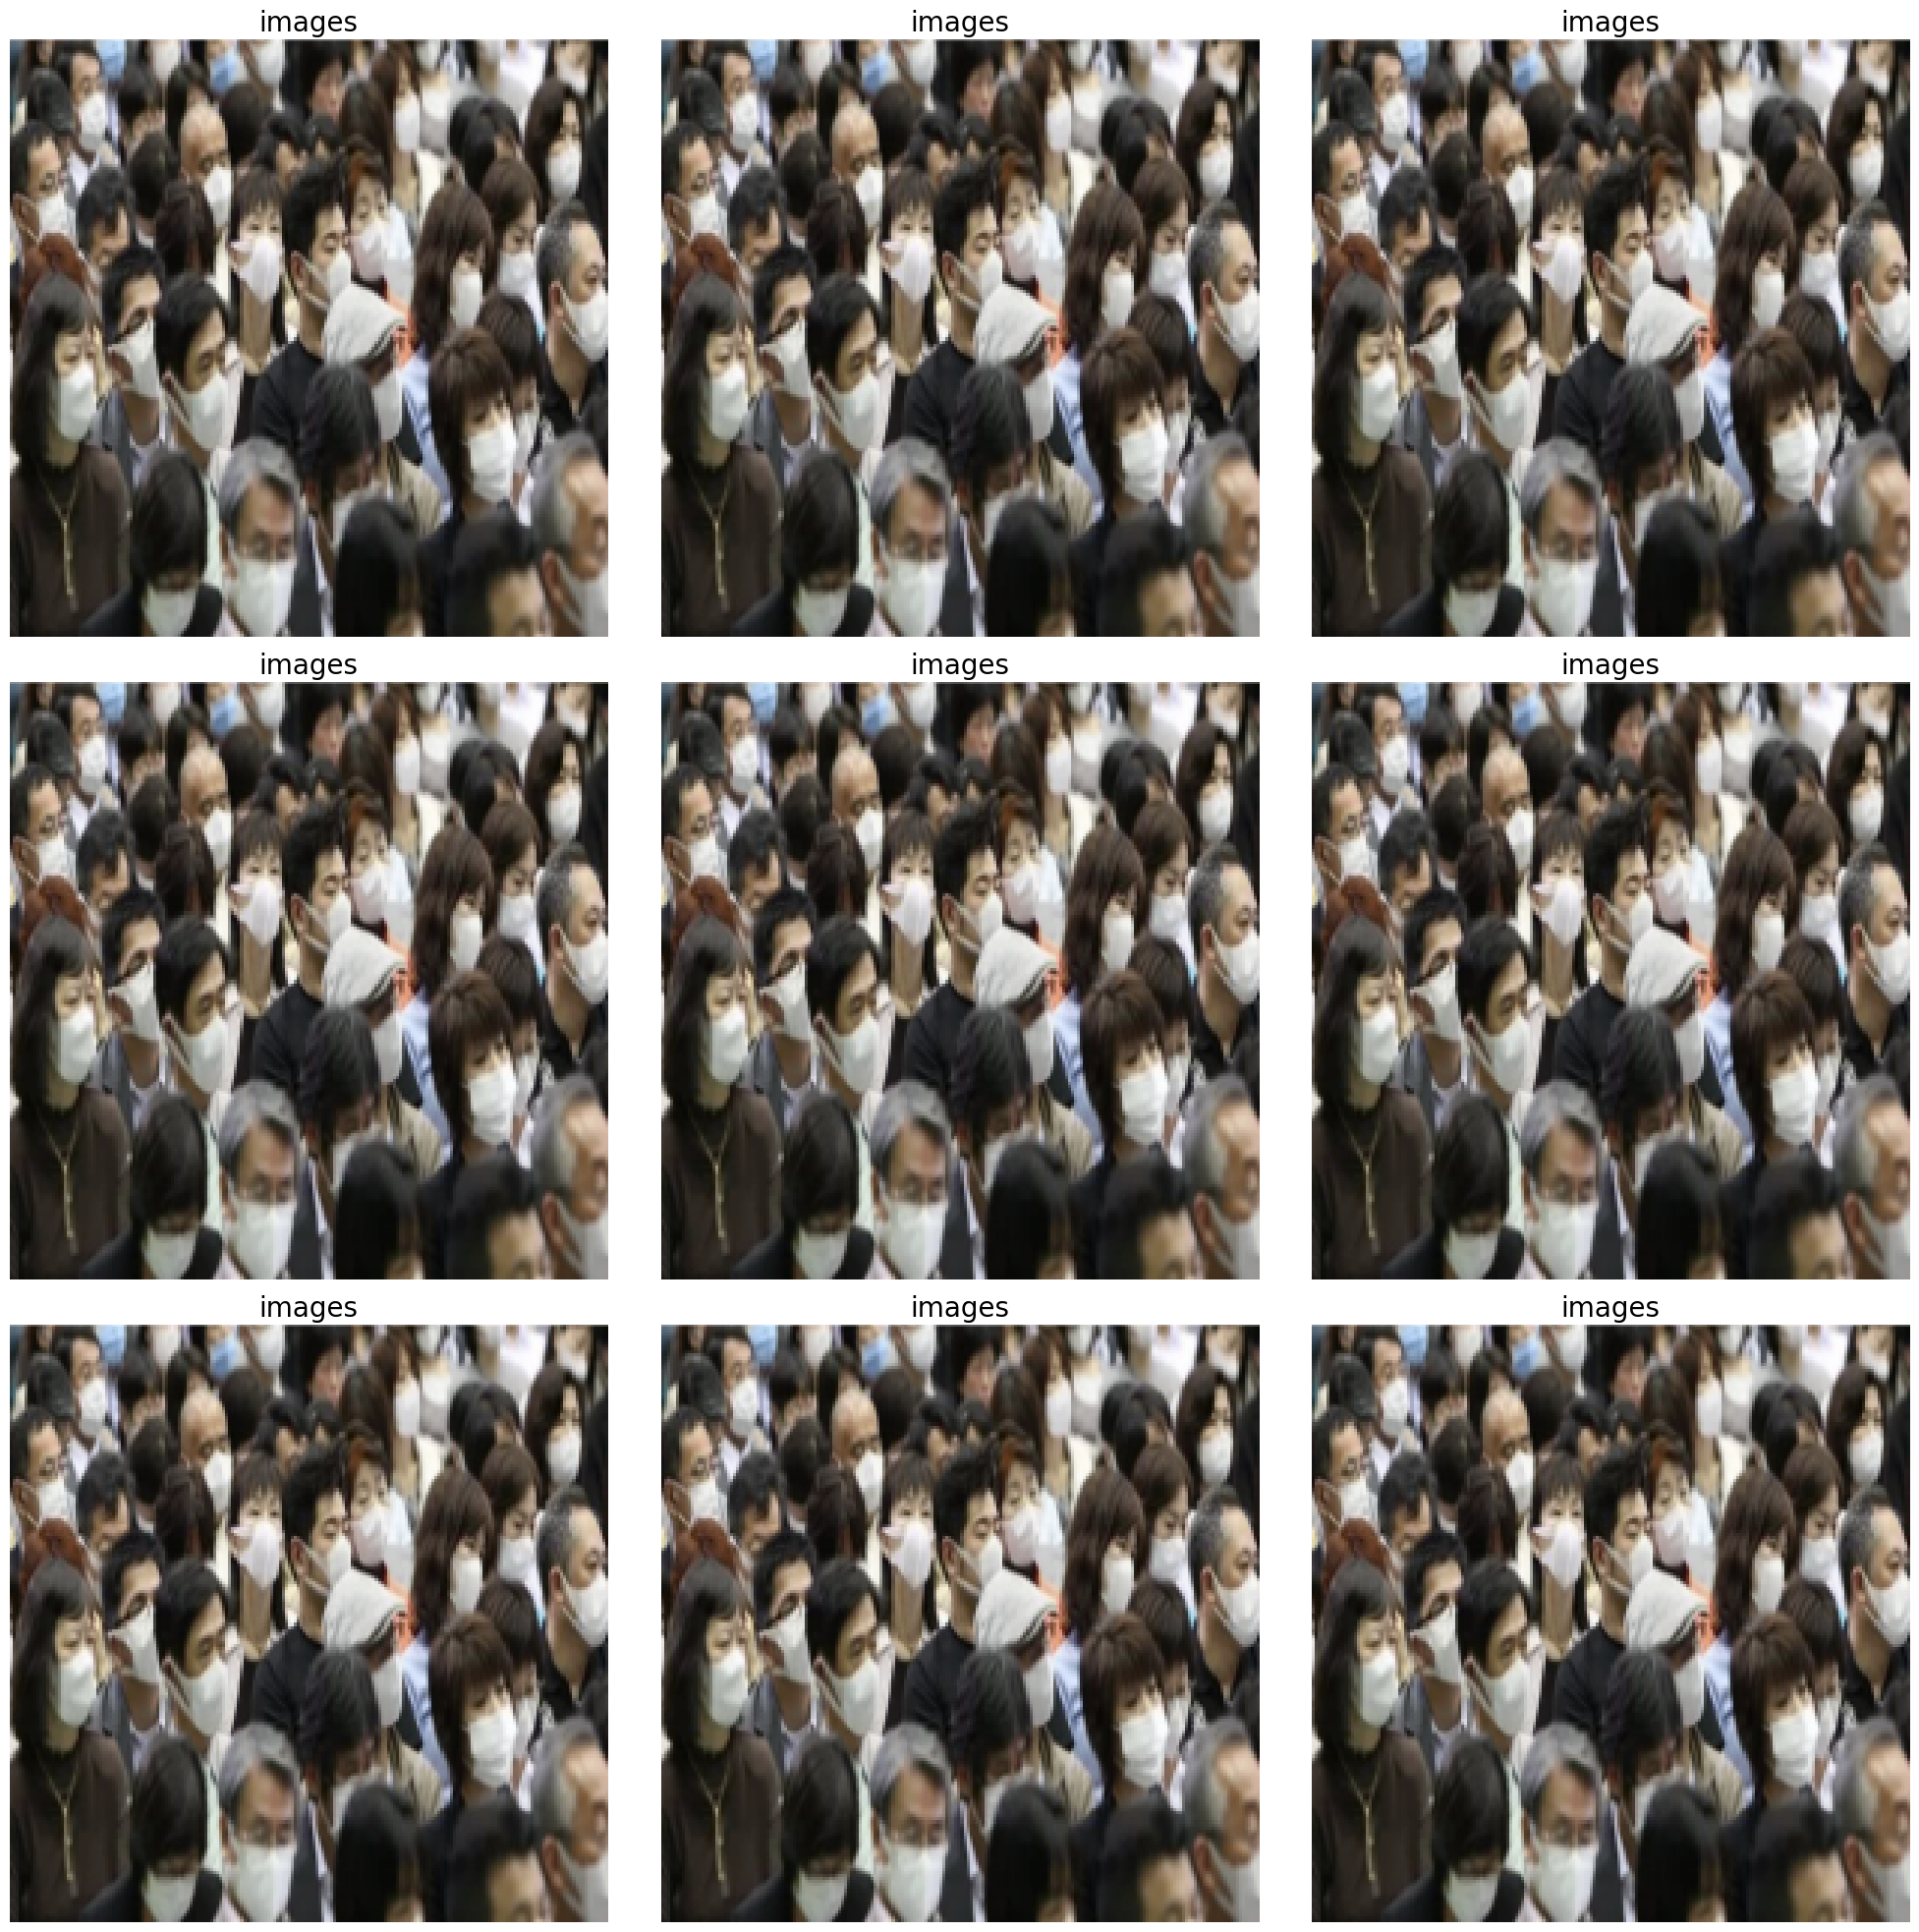

In [ ]:
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import glob

images = []
X, y = [], []
ppc = 16
sz = 200
img_path = '/content/gdrive/MyDrive/FACE MASK/images/maksssksksss251.png'

image_files = glob.glob(img_path)
label = img_path.split('/')[-2]  # Extracting label from the path

print(label, len(image_files))

for image_file in image_files:
    image = resize(imread(image_file), (sz, sz))
    images.append(image)
    X.append(image)
    y.append(label)

n = 3
indices = np.random.choice(len(images), n * n)

plt.figure(figsize=(20, 20))
plt.gray()
i = 1
for index in indices:
    plt.subplot(n, n, i)
    imshow(images[index])
    plt.axis('off')
    plt.title(y[index], size=20)
    i += 1

plt.show()
